<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Bonheur World </h1>
</div>

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Mission 
</div>

Dans cette étude de cas, nous formerons un algorithme d'apprentissage automatique non supervisé pour regrouper les pays en fonction de caractéristiques telles que la production économique, le soutien social, l'espérance de vie, la liberté, l'absence de corruption et la générosité. Le Rapport sur le bonheur dans le monde détermine l'état du bonheur mondial. Les scores de bonheur et les données de classement ont été collectés en demandant aux individus de classer leur vie de 0 (la pire vie possible) à 10 (la meilleure vie possible).         

- Un notebook contenant les fonctions permettant le prétraitement des données ainsi que les résultats du clustering (en y incluant des représentations graphiques) ....
- Un support de présentation qui présente la démarche et les résultats du clustering.

In [1]:
from os import getcwd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tqdm import tqdm
from bonheur_bed_ara import *

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Chargement des données
</div>

In [19]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
force_reloading = True

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_set_path = file_path + "dataset\\"
country_col_name = "country"
country_official_col_name = "country_official"

print(f"Current execution path : {file_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\dataset\


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Données pays
</div>

In [28]:
pays_file_name = "data_set_countries_clean.csv"

df_pays_origin = pd.read_csv(data_set_path+pays_file_name, sep=',')
df_pays_origin = df_pays_origin.sort_values(by=country_col_name)
df_pays_origin["id"] = df_pays_origin["id"].fillna(-1)
df_pays_origin["id"] = df_pays_origin["id"].astype(int)
df_pays_origin = df_pays_origin.reset_index()
df_pays_origin = df_pays_origin.drop("index", axis=1)

print(f"{df_pays_origin.shape} données chargées ------> {list(df_pays_origin.columns)}")
df_pays_origin.head()

(211, 8) données chargées ------> ['id', 'alpha3', 'alpha2', 'country', 'country_official', 'continent_code', 'latitude', 'longitude']


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
0,4,AFG,AF,Afghanistan,Islamic Republic of Afghanistan,AS,29.276770,42.274721
1,8,ALB,AL,Albania,Republic of Albania,EU,21.483333,36.066667
2,12,DZA,DZ,Algeria,People's Democratic Republic of Algeria,AF,14.349729,43.892024
3,24,AGO,AO,Angola,Republic of Angola,AF,41.795972,12.235112
4,10,ATA,AQ,Antarctica,Antarctica,NaN,-22.016981,-47.920533


In [29]:
df_pays_origin.dtypes

id                    int32
alpha3               object
alpha2               object
country              object
country_official     object
continent_code       object
latitude            float64
longitude           float64
dtype: object

In [30]:
df_pays_origin.describe(include="all")

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
count,211.000000,210,209,211,210,179,196.000000,196.000000
unique,NaN,207,207,211,208,5,NaN,NaN
top,NaN,-99,SO,Afghanistan,Federal Republic of Somalia,AF,NaN,NaN
freq,NaN,4,2,1,2,55,NaN,NaN
mean,342.161137,NaN,NaN,NaN,NaN,NaN,25.021076,22.184159
std,280.643941,NaN,NaN,NaN,NaN,NaN,24.689110,61.258969
min,-1.000000,NaN,NaN,NaN,NaN,NaN,-41.333167,-149.400973
25%,66.000000,NaN,NaN,NaN,NaN,NaN,13.237147,-1.181131
50%,324.000000,NaN,NaN,NaN,NaN,NaN,32.198381,22.055167
75%,582.000000,NaN,NaN,NaN,NaN,NaN,45.511673,46.696418


In [32]:
df_pays_origin[df_pays_origin["alpha2"].duplicated()]

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
125,516,NAM,NaN,Namibia,Republic of Namibia,AF,34.530234,69.230180
136,-1,-99,CY,Northern Cyprus,Republic of Cyprus,AS,34.683875,32.605168
172,-1,-99,SO,Somaliland,Federal Republic of Somalia,AF,11.795646,41.012891


In [42]:
# correction des doublons
df_pays_origin.loc[df_pays_origin["alpha3"]=="NAM", "alpha2"] = "NA"
df_pays_origin = df_pays_origin.drop_duplicates(subset=["alpha2"], keep="first")
print(df_pays_origin[df_pays_origin["alpha2"].duplicated()].shape)
df_pays_origin[(df_pays_origin["alpha2"]=="SO") | (df_pays_origin["alpha2"]=="CY")| (df_pays_origin["alpha3"]=="NAM")]

(0, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
42,196,CYP,CY,Cyprus,Republic of Cyprus,AS,34.683875,32.605168
125,516,NAM,NA,Namibia,Republic of Namibia,AF,34.530234,69.230180
171,706,SOM,SO,Somalia,Federal Republic of Somalia,AF,11.795646,41.012891


In [ ]:
df_pays_origin[df_pays_origin["alpha3"].duplicated()]

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
207,-1,-99,EH,Western Sahara,Western Sahara,NaN,-33.811754,151.026675


In [44]:
print(df_pays_origin[df_pays_origin["alpha3"].duplicated()].shape)
df_pays_origin[df_pays_origin["alpha3"]=="-99"]

(1, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
95,-1,-99,NaN,Kosovo,NaN,NaN,29.364473,112.390565
207,-1,-99,EH,Western Sahara,Western Sahara,NaN,-33.811754,151.026675


In [46]:
df_pays_origin.loc[df_pays_origin["alpha3"]=="-99", "alpha3"] = np.nan
print(df_pays_origin[df_pays_origin["alpha3"].duplicated()].shape)
df_pays_origin[df_pays_origin["alpha3"].duplicated()]

(2, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
155,-1,NaN,RE,Reunion,Réunion,AF,-21.130689,55.526479
207,-1,NaN,EH,Western Sahara,Western Sahara,NaN,-33.811754,151.026675


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Evolution des scores
</div>

In [20]:
data_evolution_name = "evolution_score_altasocio_2022-03-31.csv"
df_evolution_orgin = pd.read_csv(data_set_path+data_evolution_name, sep=',')
df_evolution_orgin = df_evolution_orgin.rename(columns={"pays":country_col_name})
df_evolution_orgin = df_evolution_orgin.sort_values(by=country_col_name)

# correction des types
df_evolution_orgin = df_correct_type_to_float(df_evolution_orgin, exclude_cols=[country_col_name])

print(f"{df_evolution_orgin.shape} données chargées ------> {list(df_evolution_orgin.columns)}")
df_evolution_orgin.head()

(165, 8) données chargées ------> ['country', 'score_2015', 'score_2016', 'score_2017', 'score_2018', 'score_2019', 'score_2020', 'country_official']


,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
164,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.567,Islamic Republic of Afghanistan
115,Afrique du Sud,4.642,4.459,4.829,4.724,4.722,4.814,Republic of South Africa
111,Albanie,4.959,4.655,4.644,4.586,4.719,4.883,Republic of Albania
106,Algérie,5.605,6.355,5.872,5.295,5.211,5.005,People's Democratic Republic of Algeria
16,Allemagne,6.750,6.994,6.951,6.965,6.985,7.076,Federal Republic of Germany


In [21]:
df_evolution_orgin.dtypes

country              object
score_2015          float64
score_2016          float64
score_2017          float64
score_2018          float64
score_2019          float64
score_2020          float64
country_official     object
dtype: object

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Détails des scores
</div>

In [6]:
score_dataset_filenames = []
score_rapport_with ="Rapport-bonheur-"

world_datas_files = []
world_start_with ="world_"

# récupération données
extensions = [".csv", ".xls"]

for ext in extensions:
    score_dataset_filenames.extend(get_dir_files(data_set_path, start_with=score_rapport_with , endwith=ext))
    world_datas_files.extend(get_dir_files(data_set_path, start_with=world_start_with , endwith=ext))

print(f"{len(score_dataset_filenames)} Fichiers score à traiter et {len(world_datas_files)} Fichiers monde à traiter")

4 Fichiers score à traiter et 18 Fichiers monde à traiter


In [8]:
df_origine_light, df_origine_by_line, df_origine = load_scores_files(score_dataset_filenames, data_set_path, country_col_name = country_col_name, score_rapport_with=score_rapport_with, verbose=verbose)
df_origine.head()

100%|██████████| 4/4 [00:00<00:00, 53.66it/s]


,2019-rank,country,2019,2019-PIB,2019-Soutien,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Regional indicator,...,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-PIB,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption,2022_merge
0,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,South Asia,...,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005,both
1,107.0,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Central and Eastern Europe,...,5.321,5.076,1.718,1.439,0.646,0.719,0.511,0.138,0.028,both
2,88.0,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and North Africa,...,5.215,5.030,1.744,1.363,0.970,0.643,0.146,0.106,0.150,both
3,47.0,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,Latin America and Caribbean,...,6.090,5.844,1.891,1.592,1.102,0.662,0.555,0.081,0.085,both
4,116.0,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,Commonwealth of Independent States,...,5.519,5.278,1.654,1.434,0.820,0.668,0.558,0.054,0.210,both


In [9]:
df_origine_light.describe(include="all")

,country,Regional indicator,2019-rank,2022-rank,2019,2020,2021,2022,2019-PIB,2020-PIB,...,2022-Corruption,2020-Whisker-high,2021-Whisker-high,2022-Whisker-high,2020-Whisker-low,2021-Whisker-low,2022-Whisker-low,2020-Dystopia + residual,2021-Dystopia + residual,2022-Dystopia + residual
count,173,169,172.000000,163.000000,172.000000,169.000000,166.000000,163.000000,172.000000,169.000000,...,163.000000,169.000000,166.000000,163.000000,169.000000,166.000000,163.000000,169.000000,166.000000,163.000000
unique,155,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Cyprus,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,77.133721,72.809816,5.436541,5.495728,5.558627,5.569712,0.928209,9.367852,...,0.153135,5.601130,5.673717,5.690503,5.390284,5.443500,5.448926,1.951527,2.422675,1.823755
std,NaN,NaN,43.699527,40.734848,1.072702,1.071033,1.026980,1.039626,0.397462,1.203169,...,0.122763,1.055553,1.007851,1.018772,1.087394,1.047517,1.061746,0.560677,0.552866,0.543376
min,NaN,NaN,1.000000,1.000000,2.853000,2.567000,2.523000,2.404000,0.000000,6.493000,...,0.000000,2.628000,2.596000,2.469000,2.506000,2.449000,2.339000,0.257000,0.648000,0.187000
25%,NaN,NaN,43.750000,41.000000,4.617750,4.769000,4.891250,4.965500,0.653250,8.483000,...,0.064000,4.882000,5.002750,5.095000,4.632000,4.783500,4.807500,1.621000,2.128000,1.528000
50%,NaN,NaN,72.500000,75.000000,5.524000,5.536000,5.536000,5.547000,1.004000,9.658000,...,0.124000,5.636000,5.636000,5.653000,5.435000,5.435000,5.414000,2.032000,2.517000,1.895000
75%,NaN,NaN,114.250000,105.500000,6.119750,6.186000,6.223000,6.221000,1.263000,10.406000,...,0.206000,6.274000,6.319000,6.320000,6.060000,6.128000,6.122000,2.344000,2.784000,2.150500


In [10]:
df_origine_light.head()

,country,Regional indicator,2019-rank,2022-rank,2019,2020,2021,2022,2019-PIB,2020-PIB,...,2022-Corruption,2020-Whisker-high,2021-Whisker-high,2022-Whisker-high,2020-Whisker-low,2021-Whisker-low,2022-Whisker-low,2020-Dystopia + residual,2021-Dystopia + residual,2022-Dystopia + residual
0,Afghanistan,South Asia,154.0,146.0,3.203,2.567,2.523,2.404,0.350,7.463,...,0.005,2.628,2.596,2.469,2.506,2.449,2.339,1.507,1.895,1.263
1,Albania,Central and Eastern Europe,107.0,90.0,4.719,4.883,5.117,5.199,0.947,9.418,...,0.028,4.993,5.234,5.321,4.773,5.001,5.076,1.641,2.250,1.718
2,Algeria,Middle East and North Africa,88.0,96.0,5.211,5.005,4.887,5.122,1.002,9.538,...,0.150,5.092,4.991,5.215,4.918,4.783,5.030,1.841,2.242,1.744
3,Argentina,Latin America and Caribbean,47.0,57.0,6.086,5.975,5.929,5.967,1.092,9.811,...,0.085,6.079,6.040,6.090,5.870,5.819,5.844,2.073,2.461,1.891
4,Armenia,Commonwealth of Independent States,116.0,82.0,4.559,4.677,5.283,5.399,0.850,9.100,...,0.210,4.792,5.397,5.519,4.562,5.168,5.278,1.468,2.127,1.654


<div style="display: flex; background-color: indigo;" >

#### 2.3.x. Complément des données
</div>

In [11]:
df_origine_light_completed = complete_df_with_country_datas(df_origine_light, country_col_name=country_col_name, verbose=verbose)
cols_names = list(df_origine_light_completed.columns)
cols_names.remove('country_official')
cols_names.insert(1, 'country_official')
df_origine_light_completed = df_origine_light_completed[cols_names]
df_origine_light_completed.head()

,country,country_official,Regional indicator,2019-rank,2022-rank,2019,2020,2021,2022,2019-PIB,...,2022-Corruption,2020-Whisker-high,2021-Whisker-high,2022-Whisker-high,2020-Whisker-low,2021-Whisker-low,2022-Whisker-low,2020-Dystopia + residual,2021-Dystopia + residual,2022-Dystopia + residual
0,Afghanistan,Islamic Republic of Afghanistan,South Asia,154.0,146.0,3.203,2.567,2.523,2.404,0.350,...,0.005,2.628,2.596,2.469,2.506,2.449,2.339,1.507,1.895,1.263
1,Albania,Republic of Albania,Central and Eastern Europe,107.0,90.0,4.719,4.883,5.117,5.199,0.947,...,0.028,4.993,5.234,5.321,4.773,5.001,5.076,1.641,2.250,1.718
2,Algeria,People's Democratic Republic of Algeria,Middle East and North Africa,88.0,96.0,5.211,5.005,4.887,5.122,1.002,...,0.150,5.092,4.991,5.215,4.918,4.783,5.030,1.841,2.242,1.744
3,Argentina,Argentine Republic,Latin America and Caribbean,47.0,57.0,6.086,5.975,5.929,5.967,1.092,...,0.085,6.079,6.040,6.090,5.870,5.819,5.844,2.073,2.461,1.891
4,Armenia,Republic of Armenia,Commonwealth of Independent States,116.0,82.0,4.559,4.677,5.283,5.399,0.850,...,0.210,4.792,5.397,5.519,4.562,5.168,5.278,1.468,2.127,1.654


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Fusion Détails des scores et évolution des scores
</div>

In [12]:
df_origine_light_merged = df_origine_light_completed.merge(df_evolution_orgin, on=country_official_col_name, how="left", indicator=True)
print(df_origine_light_completed.shape, df_evolution_orgin.shape, df_origine_light_merged.shape)
# Réorganisation des colonnes
cols_names = list(df_origine_light_merged.columns)
cols_names.remove('country_y')
init_pos = 3
for i in range(2015, 2021, 1):
    c_n = 'score_'+str(i)
    cols_names.remove(c_n)
    cols_names.insert(init_pos, c_n)
    init_pos += 1
    
# score_2015	score_2016	score_2017	score_2018	score_2019	score_2020
cols_names.insert(1, 'country_y')
df_origine_light_merged = df_origine_light_merged[cols_names]
df_origine_light_merged = df_origine_light_merged.rename(columns={"country_x":"country", "country_y":"country_FR"})
df_origine_light_merged.head()

(173, 42) (165, 8) (180, 50)


,country,country_FR,country_official,Regional indicator,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,...,2020-Whisker-high,2021-Whisker-high,2022-Whisker-high,2020-Whisker-low,2021-Whisker-low,2022-Whisker-low,2020-Dystopia + residual,2021-Dystopia + residual,2022-Dystopia + residual,_merge
0,Afghanistan,Afghanistan,Islamic Republic of Afghanistan,South Asia,3.575,3.360,3.794,3.632,3.203,2.567,...,2.628,2.596,2.469,2.506,2.449,2.339,1.507,1.895,1.263,both
1,Albania,Albanie,Republic of Albania,Central and Eastern Europe,4.959,4.655,4.644,4.586,4.719,4.883,...,4.993,5.234,5.321,4.773,5.001,5.076,1.641,2.250,1.718,both
2,Algeria,Algérie,People's Democratic Republic of Algeria,Middle East and North Africa,5.605,6.355,5.872,5.295,5.211,5.005,...,5.092,4.991,5.215,4.918,4.783,5.030,1.841,2.242,1.744,both
3,Argentina,Argentine,Argentine Republic,Latin America and Caribbean,6.574,6.650,6.599,6.388,6.086,5.975,...,6.079,6.040,6.090,5.870,5.819,5.844,2.073,2.461,1.891,both
4,Armenia,Arménie,Republic of Armenia,Commonwealth of Independent States,4.350,4.360,4.376,4.321,4.559,4.677,...,4.792,5.397,5.519,4.562,5.168,5.278,1.468,2.127,1.654,both


In [13]:
df_origine_light_merged.columns

Index(['country', 'country_FR', 'country_official', 'Regional indicator',
       'score_2015', 'score_2016', 'score_2017', 'score_2018', 'score_2019',
       'score_2020', '2019-rank', '2022-rank', '2019', '2020', '2021', '2022',
       '2019-PIB', '2020-PIB', '2021-PIB', '2022-PIB', '2019-Soutien',
       '2020-Soutien', '2021-Soutien', '2022-Soutien', '2019-Esperance vie BS',
       '2020-Esperance vie BS', '2021-Esperance vie BS',
       '2022-Esperance vie BS', '2019-Liberte des choix de vie',
       '2020-Liberte des choix de vie', '2021-Liberte des choix de vie',
       '2022-Liberte des choix de vie', '2019-Generosite', '2020-Generosite',
       '2021-Generosite', '2022-Generosite', '2019-Corruption',
       '2020-Corruption', '2021-Corruption', '2022-Corruption',
       '2020-Whisker-high', '2021-Whisker-high', '2022-Whisker-high',
       '2020-Whisker-low', '2021-Whisker-low', '2022-Whisker-low',
       '2020-Dystopia + residual', '2021-Dystopia + residual',
       '2022-Dysto

In [14]:
for i in range(2019, 2021, 1):
    df_origine_light_merged['score_'+str(i)] = df_origine_light_merged['score_'+str(i)].fillna(df_origine_light_merged[str(i)])

In [15]:
df_origine_light_merged.loc[df_origine_light_merged["_merge"]!="both", ['country', 'country_FR', 'country_official', 'Regional indicator',
       'score_2019','2019', 'score_2020',  '2020']]

,country,country_FR,country_official,Regional indicator,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,2019-rank,2022-rank,2019,2020,2021,2022
87,Ivory Coast,NaN,Ivory Coast,Sub-Saharan Africa,NaN,NaN,NaN,NaN,4.944,5.233,99.0,88.0,4.944,5.233,5.306,5.235
104,Macedonia,NaN,Macedonia,Central and Eastern Europe,NaN,NaN,NaN,NaN,5.274,5.160,84.0,89.0,5.274,5.160,5.101,5.199
129,Palestinian Territories,NaN,State of Palestine,Middle East and North Africa,NaN,NaN,NaN,NaN,4.696,4.553,110.0,122.0,4.696,4.553,4.517,4.483
138,Russia,NaN,Russia,Commonwealth of Independent States,NaN,NaN,NaN,NaN,5.648,5.546,68.0,80.0,5.648,5.546,5.477,5.459
147,Slovenia,NaN,Republic of Slovenia,Central and Eastern Europe,NaN,NaN,NaN,NaN,6.118,6.363,44.0,22.0,6.118,6.363,6.461,6.630


Il y a 5 pays qui n'ont pas de score entre 2015 et 2020

In [16]:
print(df_origine_light_merged.loc[df_origine_light_merged["score_2019"] != df_origine_light_merged["2019"],['country', 'country_FR', 'country_official', 'Regional indicator','score_2019','2019']].shape)
df_origine_light_merged.loc[df_origine_light_merged["score_2019"] != df_origine_light_merged["2019"],['country', 'country_FR', 'country_official', 'Regional indicator','score_2019','2019']]

(15, 6)


,country,country_FR,country_official,Regional indicator,score_2019,2019
30,Congo,Congo,Republic of the Congo,Sub-Saharan Africa,4.812,4.418
32,Congo,Congo,Republic of the Congo,Sub-Saharan Africa,4.812,4.418
35,Congo,Congo (RDC),Republic of the Congo,Sub-Saharan Africa,4.418,4.812
37,Congo,Congo (RDC),Republic of the Congo,Sub-Saharan Africa,4.418,4.812
40,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.046,5.718
41,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.046,5.718
42,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.046,5.718
43,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.046,5.718
44,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.046,5.718
45,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.046,5.718


In [17]:
print(df_origine_light_merged.loc[df_origine_light_merged["score_2020"] != df_origine_light_merged["2020"],['country', 'country_FR', 'country_official', 'Regional indicator','score_2020', '2020']].shape)
df_origine_light_merged.loc[df_origine_light_merged["score_2020"] != df_origine_light_merged["2020"],['country', 'country_FR', 'country_official', 'Regional indicator','score_2020', '2020']]

(18, 6)


,country,country_FR,country_official,Regional indicator,score_2020,2020
13,Bhutan,Bhoutan,Kingdom of Bhutan,NaN,NaN,NaN
30,Congo,Congo,Republic of the Congo,Sub-Saharan Africa,5.194,4.311
33,Congo,Congo (RDC),Republic of the Congo,Sub-Saharan Africa,4.311,5.194
35,Congo,Congo (RDC),Republic of the Congo,Sub-Saharan Africa,4.311,5.194
36,Congo,Congo,Republic of the Congo,Sub-Saharan Africa,5.194,4.311
41,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.159,5.536
42,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.159,5.536
43,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.159,5.536
44,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.159,5.536
48,Cyprus,Chypre,Republic of Cyprus,Western Europe,6.159,5.536


In [17]:
df_origine_light_merged.loc[df_origine_light_merged["score_2019"] != df_origine_light_merged["2019"],['country', 'country_FR', 'country_official', 'Regional indicator',
       'score_2019','2019','score_2020', '2020']].shape

(15, 8)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Visualisation des données
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.1.1 DF données fournies > 2019
</div>

In [18]:
df_origine.describe(include='all')

,2019-rank,country,2019,2019-PIB,2019-Soutien,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Regional indicator,...,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-PIB,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption,2022_merge
count,172.000000,173,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,169,...,163,163,163,163,163,163,163,163,163,173
unique,NaN,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,...,144,141,138,141,133,134,128,116,116,2
top,NaN,Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,...,"5,609","6,122","1,078","1,815","0,888","0,819","0,448","0,13","0,062",both
freq,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,...,8,8,8,17,8,16,10,12,8,163
mean,77.133721,NaN,5.436541,0.928209,1.208279,0.747622,0.393273,0.185000,0.109424,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,43.699527,NaN,1.072702,0.397462,0.286788,0.248834,0.136872,0.090932,0.091801,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,43.750000,NaN,4.617750,0.653250,1.090750,0.555000,0.313000,0.112500,0.041750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,72.500000,NaN,5.524000,1.004000,1.252000,0.808000,0.416500,0.187000,0.085500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,114.250000,NaN,6.119750,1.263000,1.438250,0.968750,0.497250,0.244000,0.144750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_origine = df_origine.rename(columns={'Country or region':'country', 
                                        'Score':2019,
                                        'GDP per capita':'2019-PIB', 
                                        'Social support':'2019-Soutien',
                                        'Healthy life expectancy':'2019-Esperance vie BS',
                                        'Freedom to make life choices':'2019-Liberte des choix de vie',
                                        'Generosity':'2019-Generosite',
                                        'Perceptions of corruption':'2019-Corruption'
                                        })
df_origine.columns

Index(['2019-rank', 'country', '2019', '2019-PIB', '2019-Soutien',
       '2019-Esperance vie BS', '2019-Liberte des choix de vie',
       '2019-Generosite', '2019-Corruption', '2020-Regional indicator', '2020',
       '2020-Whisker-high', '2020-Whisker-low', '2020-PIB', '2020-Soutien',
       '2020-Esperance vie BS', '2020-Liberte des choix de vie',
       '2020-Generosite', '2020-Corruption', '2020-Dystopia + residual',
       '2020_merge', '2021-Regional indicator', '2021', '2021-Whisker-high',
       '2021-Whisker-low', '2021-PIB', '2021-Soutien', '2021-Esperance vie BS',
       '2021-Liberte des choix de vie', '2021-Generosite', '2021-Corruption',
       '2021-Dystopia + residual', '2021_merge', '2022-rank', '2022',
       '2022-Whisker-high', '2022-Whisker-low', '2022-Dystopia + residual',
       '2022-PIB', '2022-Soutien', '2022-Esperance vie BS',
       '2022-Liberte des choix de vie', '2022-Generosite', '2022-Corruption',
       '2022_merge'],
      dtype='object')

<div style="display: flex; background-color: indigo;" >

#### 2.1.2 DF temporelle
</div>

In [20]:
df_evolution_orgin.head()

,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
164,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.567,Islamic Republic of Afghanistan
115,Afrique du Sud,4.642,4.459,4.829,4.724,4.722,4.814,Republic of South Africa
111,Albanie,4.959,4.655,4.644,4.586,4.719,4.883,Republic of Albania
106,Algérie,5.605,6.355,5.872,5.295,5.211,5.005,People's Democratic Republic of Algeria
16,Allemagne,6.750,6.994,6.951,6.965,6.985,7.076,Federal Republic of Germany


In [21]:
df_evolution_orgin = df_evolution_orgin.rename(columns={"pays":"country"})
df_evolution_orgin.columns

Index(['country', 'score_2015', 'score_2016', 'score_2017', 'score_2018',
       'score_2019', 'score_2020', 'country_official'],
      dtype='object')

In [22]:
df_evolution_orgin.describe(include="all")

,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
count,165,158.000000,157.000000,155.000000,156.000000,156.000000,153.000000,165
unique,165,NaN,NaN,NaN,NaN,NaN,NaN,161
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,Federal Republic of Somalia
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,5.375778,5.382185,5.367619,5.375917,5.407032,5.473255,NaN
std,NaN,1.144889,1.141674,1.142394,1.119506,1.113085,1.112288,NaN
min,NaN,2.839000,2.905000,2.693000,2.905000,2.853000,2.567000,NaN
25%,NaN,4.526000,4.404000,4.505500,4.453750,4.544500,4.724000,NaN
50%,NaN,5.232500,5.314000,5.293000,5.378000,5.379500,5.515000,NaN
75%,NaN,6.243750,6.269000,6.136500,6.168500,6.184500,6.228000,NaN


<div style="display: flex; background-color: indigo;" >

#### 2.1.3 DF données pays
</div>

In [23]:
df_pays_origin = df_pays_origin.rename(columns={"id":"id_country", 'country_official':'official_name'})
df_pays_origin.columns

Index(['id_country', 'alpha3', 'alpha2', 'country', 'official_name',
       'continent_code', 'latitude', 'longitude'],
      dtype='object')

In [24]:
print(df_pays_origin.shape)
df_pays_origin.describe(include="all")

(211, 8)


,id_country,alpha3,alpha2,country,official_name,continent_code,latitude,longitude
count,172.000000,210,209,211,210,179,196.000000,196.000000
unique,NaN,207,207,211,208,5,NaN,NaN
top,NaN,-99,SO,Afghanistan,Federal Republic of Somalia,AF,NaN,NaN
freq,NaN,4,2,1,2,55,NaN,NaN
mean,419.970930,NaN,NaN,NaN,NaN,NaN,25.021076,22.184159
std,252.540783,NaN,NaN,NaN,NaN,NaN,24.689110,61.258969
min,4.000000,NaN,NaN,NaN,NaN,NaN,-41.333167,-149.400973
25%,207.000000,NaN,NaN,NaN,NaN,NaN,13.237147,-1.181131
50%,409.000000,NaN,NaN,NaN,NaN,NaN,32.198381,22.055167
75%,627.000000,NaN,NaN,NaN,NaN,NaN,45.511673,46.696418


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Fusion des DF
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.2.1. Fusion dataset source et données temporelles
</div>

In [25]:
print(f"ORIGIN : {df_origine.shape}, {df_evolution_orgin.shape}, AFTER ", end="")
df_global = df_origine.merge(df_evolution_orgin, on='country', how="outer", indicator=True)
print(df_global.shape)
df_global.head()

ORIGIN : (173, 45), (165, 8), AFTER (293, 53)


,2019-rank,country,2019,2019-PIB,2019-Soutien,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Regional indicator,...,2022-Corruption,2022_merge,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official,_merge
0,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,South Asia,...,"0,005",both,3.575,3.36,3.794,3.632,3.203,2.567,Islamic Republic of Afghanistan,both
1,107.0,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Central and Eastern Europe,...,"0,028",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,88.0,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and North Africa,...,"0,15",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,47.0,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,Latin America and Caribbean,...,"0,085",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,116.0,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,Commonwealth of Independent States,...,"0,21",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [26]:
df_global[df_global["_merge"]!="both"]

,2019-rank,country,2019,2019-PIB,2019-Soutien,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Regional indicator,...,2022-Corruption,2022_merge,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official,_merge
1,107.0,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Central and Eastern Europe,...,"0,028",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,88.0,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and North Africa,...,"0,15",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,47.0,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,Latin America and Caribbean,...,"0,085",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,116.0,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,Commonwealth of Independent States,...,"0,21",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,11.0,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290,North America and ANZ,...,"0,341",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,NaN,Égypte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.194,4.362,4.735,4.419,4.166,4.151,Arab Republic of Egypt,right_only
289,NaN,Émirats arabes unis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.901,6.573,6.648,6.774,6.825,6.791,United Arab Emirates,right_only
290,NaN,Équateur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.975,5.976,6.008,5.973,6.028,5.925,Republic of Ecuador,right_only
291,NaN,États-Unis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.119,7.104,6.993,6.886,6.892,6.940,United States of America,right_only


<div style="display: flex; background-color: indigo;" >

#### 2.2.2. Fusion dataset intermédiaire et données pays
</div>

In [27]:
print(f"ORIGIN : {df_origine.shape}, {df_pays_origin.shape}, AFTER ", end="")
df_global = df_origine.merge(df_pays_origin, on='country', how="left", indicator=True)
print(df_global.shape)
df_global.head()

ORIGIN : (173, 45), (211, 8), AFTER (173, 53)


,2019-rank,country,2019,2019-PIB,2019-Soutien,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Regional indicator,...,2022-Corruption,2022_merge,id_country,alpha3,alpha2,official_name,continent_code,latitude,longitude,_merge
0,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,South Asia,...,"0,005",both,4.0,AFG,AF,Islamic Republic of Afghanistan,AS,29.276770,42.274721,both
1,107.0,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Central and Eastern Europe,...,"0,028",both,8.0,ALB,AL,Republic of Albania,EU,21.483333,36.066667,both
2,88.0,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and North Africa,...,"0,15",both,12.0,DZA,DZ,People's Democratic Republic of Algeria,AF,14.349729,43.892024,both
3,47.0,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,Latin America and Caribbean,...,"0,085",both,32.0,ARG,AR,Argentine Republic,SA,46.253890,142.084139,both
4,116.0,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,Commonwealth of Independent States,...,"0,21",both,51.0,ARM,AM,Republic of Armenia,AS,40.069099,45.038189,both


In [28]:
df_global[df_global["_merge"]!="both"]

,2019-rank,country,2019,2019-PIB,2019-Soutien,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Regional indicator,...,2022-Corruption,2022_merge,id_country,alpha3,alpha2,official_name,continent_code,latitude,longitude,_merge
30,127.0,Congo,4.418,0.094,1.125,0.357,0.269,0.212,0.053,Sub-Saharan Africa,...,"0,146",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
31,127.0,Congo,4.418,0.094,1.125,0.357,0.269,0.212,0.053,Sub-Saharan Africa,...,"0,146",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
32,103.0,Congo,4.812,0.673,0.799,0.508,0.372,0.105,0.093,Sub-Saharan Africa,...,"0,146",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
33,103.0,Congo,4.812,0.673,0.799,0.508,0.372,0.105,0.093,Sub-Saharan Africa,...,"0,146",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
59,135.0,Eswatini,4.212,0.811,1.149,0.000,0.313,0.074,0.135,Sub-Saharan Africa,...,"0,154",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
125,110.0,Palestinian Territories,4.696,0.657,1.247,0.672,0.225,0.103,0.066,Middle East and North Africa,...,"0,079",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
138,70.0,Serbia,5.603,1.004,1.383,0.854,0.282,0.137,0.039,Central and Eastern Europe,...,"0,088",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
154,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa,...,"0,27",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
165,19.0,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,North America and ANZ,...,"0,177",both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


<div style="display: flex; background-color: Blue; padding: 15px;" >

## 3.Exploration des données
</div>

<div style="display: flex; background-color: green;" >

## 1.1. Visualisation des données
</div>


In [29]:
df_origine.shape

(173, 45)

In [30]:
df_origine.head()

,2019-rank,country,2019,2019-PIB,2019-Soutien,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Regional indicator,...,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-PIB,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption,2022_merge
0,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,South Asia,...,"2,469","2,339","1,263","0,758",0,"0,289",0,"0,089","0,005",both
1,107.0,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Central and Eastern Europe,...,"5,321","5,076","1,718","1,439","0,646","0,719","0,511","0,138","0,028",both
2,88.0,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and North Africa,...,"5,215","5,03","1,744","1,363","0,97","0,643","0,146","0,106","0,15",both
3,47.0,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,Latin America and Caribbean,...,"6,09","5,844","1,891","1,592","1,102","0,662","0,555","0,081","0,085",both
4,116.0,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,Commonwealth of Independent States,...,"5,519","5,278","1,654","1,434","0,82","0,668","0,558","0,054","0,21",both


In [31]:
df_origine.dtypes

2019-rank                         float64
country                            object
2019                              float64
2019-PIB                          float64
2019-Soutien                      float64
2019-Esperance vie BS             float64
2019-Liberte des choix de vie     float64
2019-Generosite                   float64
2019-Corruption                   float64
2020-Regional indicator            object
2020                               object
2020-Whisker-high                  object
2020-Whisker-low                   object
2020-PIB                           object
2020-Soutien                       object
2020-Esperance vie BS              object
2020-Liberte des choix de vie      object
2020-Generosite                    object
2020-Corruption                    object
2020-Dystopia + residual           object
2020_merge                       category
2021-Regional indicator            object
2021                               object
2021-Whisker-high                 

In [32]:
df_origine.describe()

,2019-rank,2019,2019-PIB,2019-Soutien,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2022-rank
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,163.000000
mean,77.133721,5.436541,0.928209,1.208279,0.747622,0.393273,0.185000,0.109424,72.809816
std,43.699527,1.072702,0.397462,0.286788,0.248834,0.136872,0.090932,0.091801,40.734848
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.750000,4.617750,0.653250,1.090750,0.555000,0.313000,0.112500,0.041750,41.000000
50%,72.500000,5.524000,1.004000,1.252000,0.808000,0.416500,0.187000,0.085500,75.000000
75%,114.250000,6.119750,1.263000,1.438250,0.968750,0.497250,0.244000,0.144750,105.500000
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,146.000000


array([[<AxesSubplot:title={'center':'2019-rank'}>,
        <AxesSubplot:title={'center':'2019'}>,
        <AxesSubplot:title={'center':'2019-PIB'}>],
       [<AxesSubplot:title={'center':'2019-Soutien'}>,
        <AxesSubplot:title={'center':'2019-Esperance vie BS'}>,
        <AxesSubplot:title={'center':'2019-Liberte des choix de vie'}>],
       [<AxesSubplot:title={'center':'2019-Generosite'}>,
        <AxesSubplot:title={'center':'2019-Corruption'}>,
        <AxesSubplot:title={'center':'2022-rank'}>]], dtype=object)

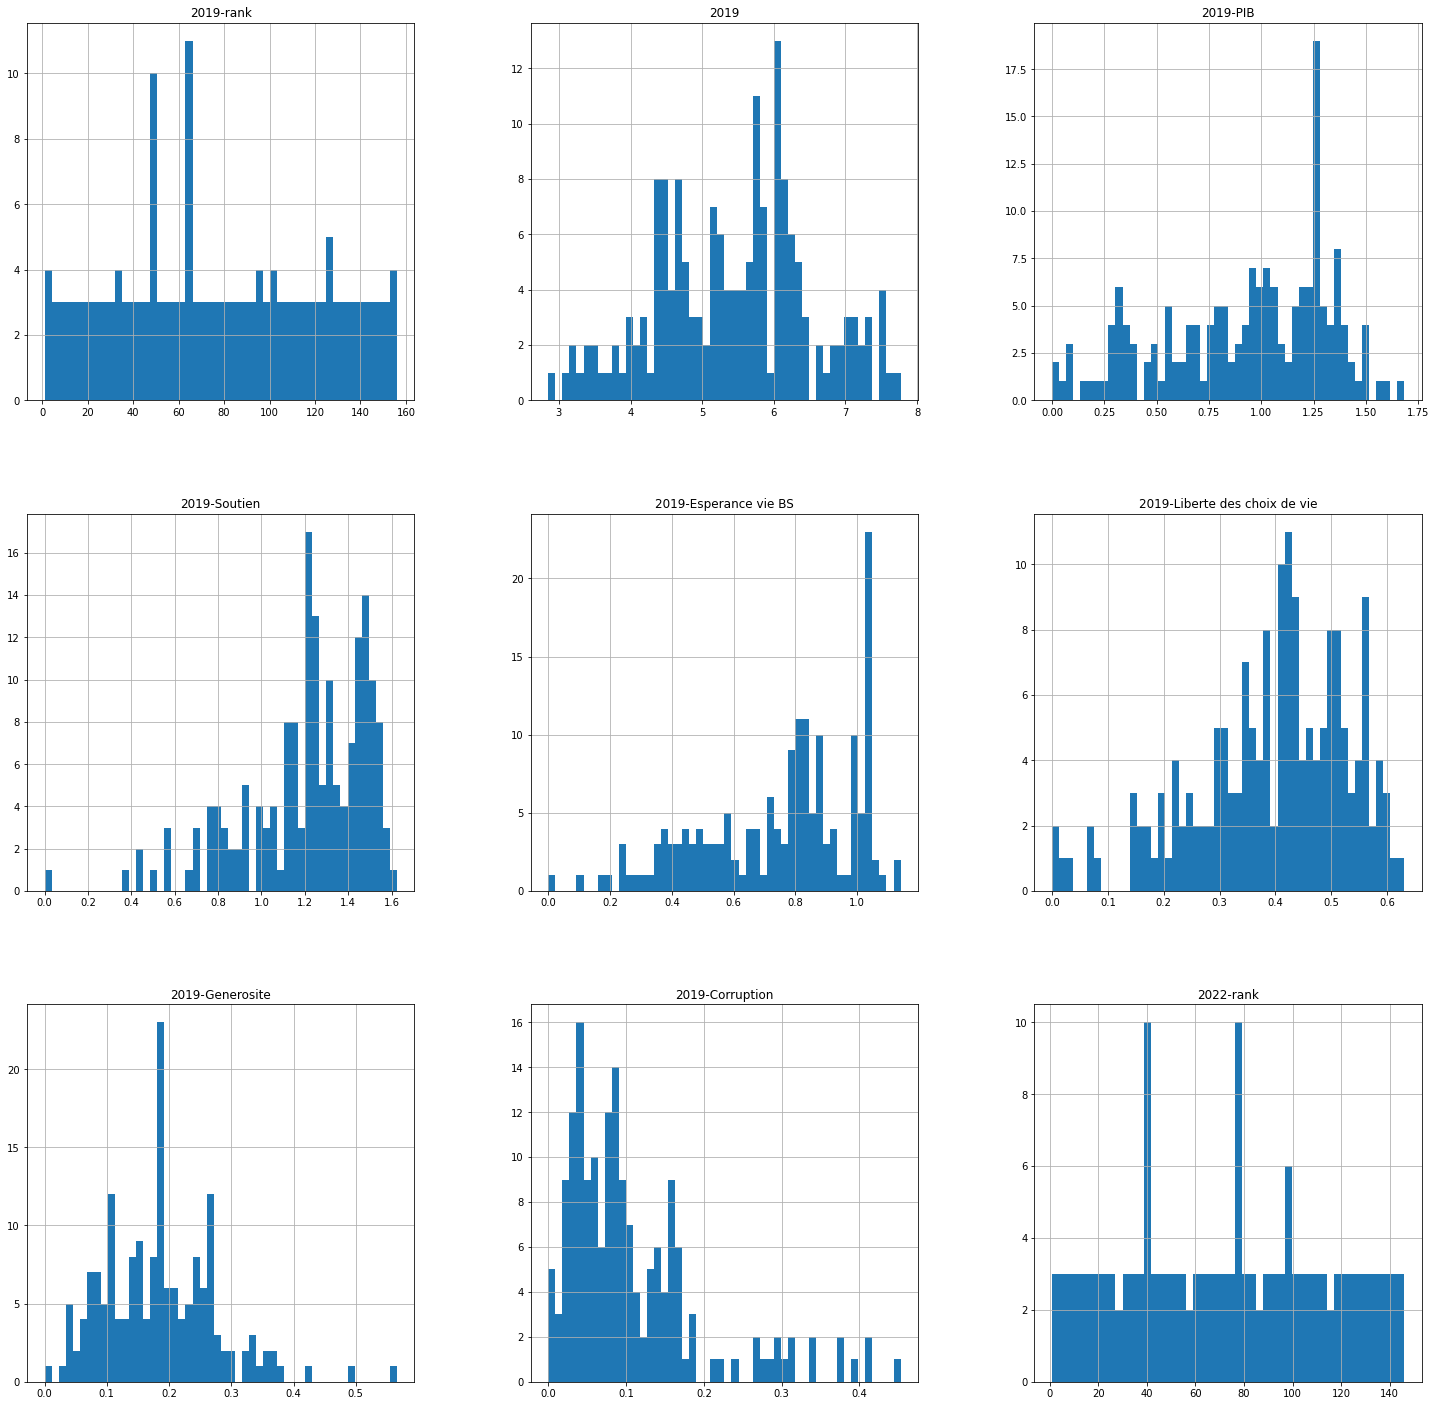

In [33]:
df_origine.hist(figsize=(25,25),bins=50)

<div style="display: flex; background-color: green;" >

## 1.2. Analyse des NaN
</div>


<AxesSubplot:>

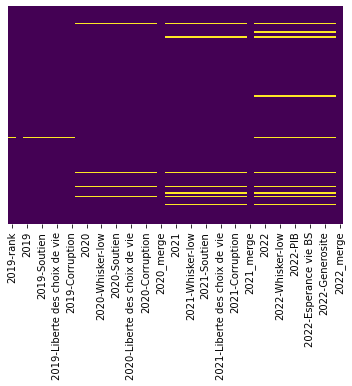

In [34]:
sns.heatmap(df_origine.isnull(), yticklabels=False,cbar=False, cmap='viridis')

<AxesSubplot:>

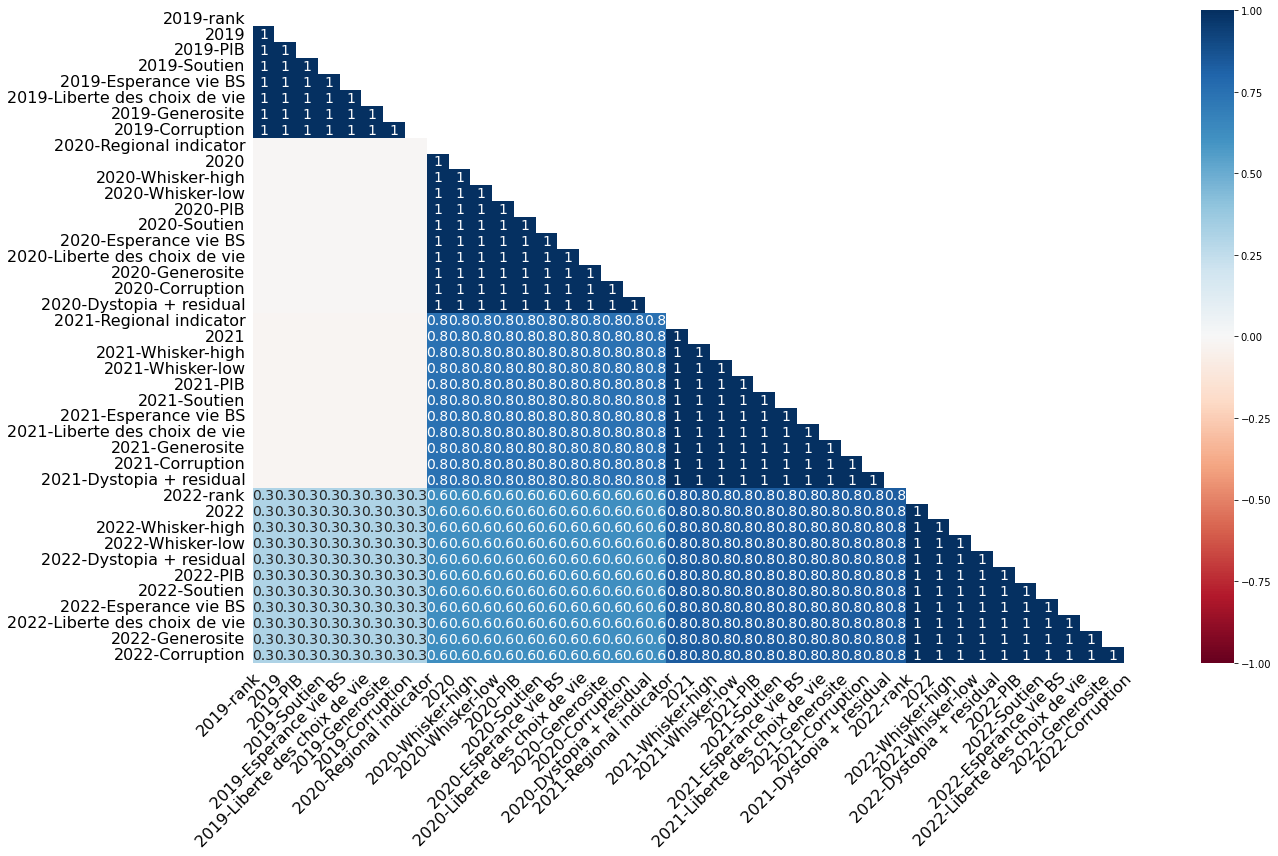

In [35]:
msno.heatmap(df_origine)

<AxesSubplot:>

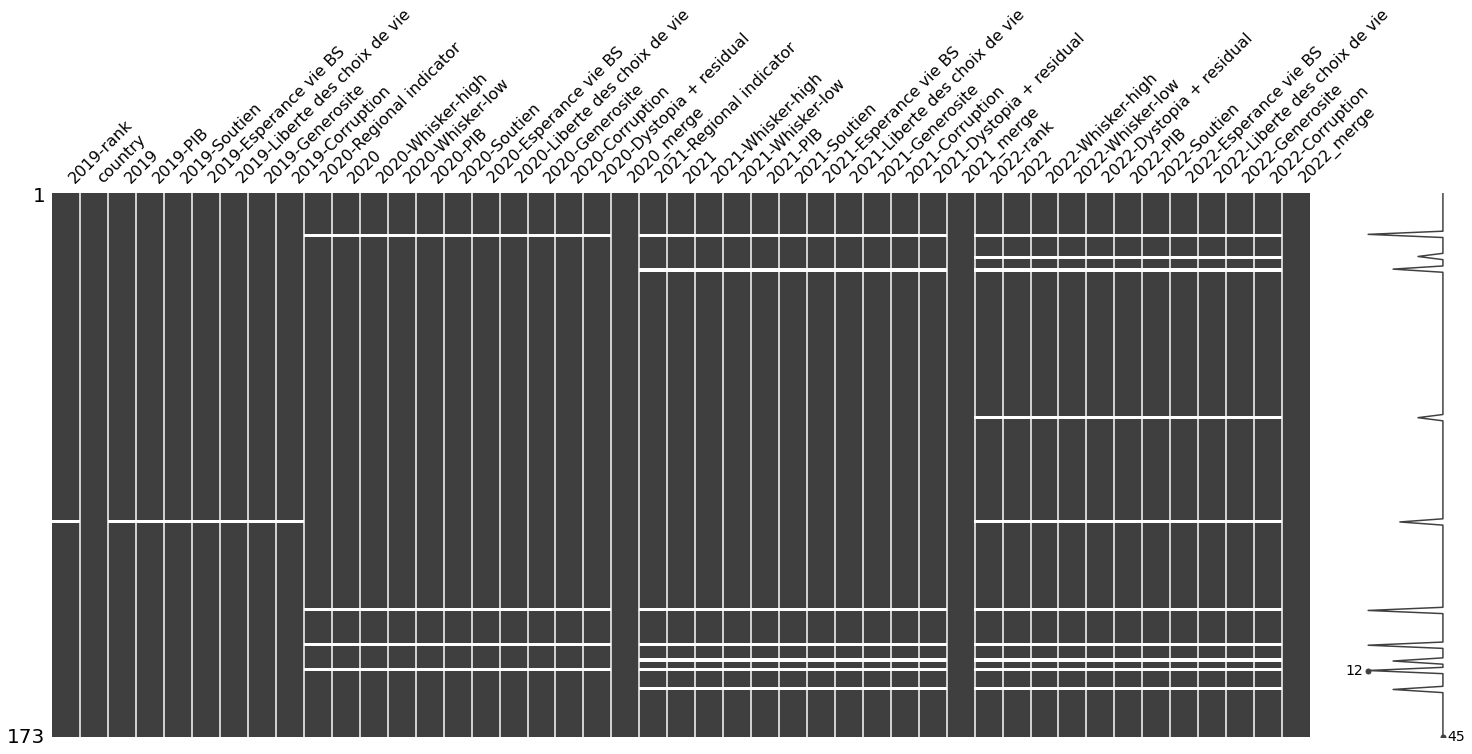

In [36]:
# Avant nettoyage
msno.matrix(df_origine)

<AxesSubplot:>

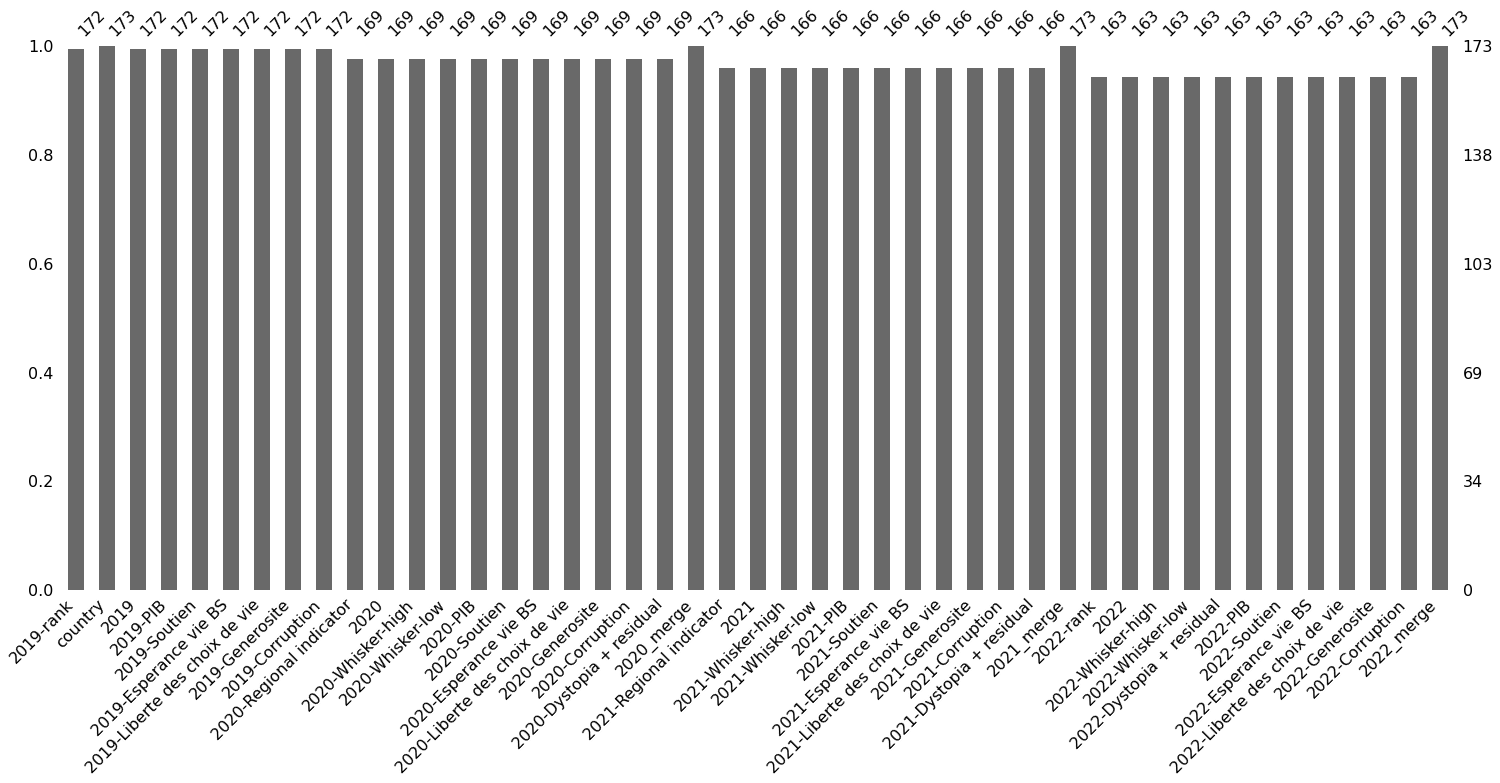

In [37]:
msno.bar(df_origine)

<div style="display: flex; background-color: green;" >

## 1.2. Corrélations entre les données
</div>


In [38]:
df_origine["score_int"] = round(df_origine["Score"])
df_origine["score_int"] = df_origine["score_int"].astype('int')

KeyError: 'Score'

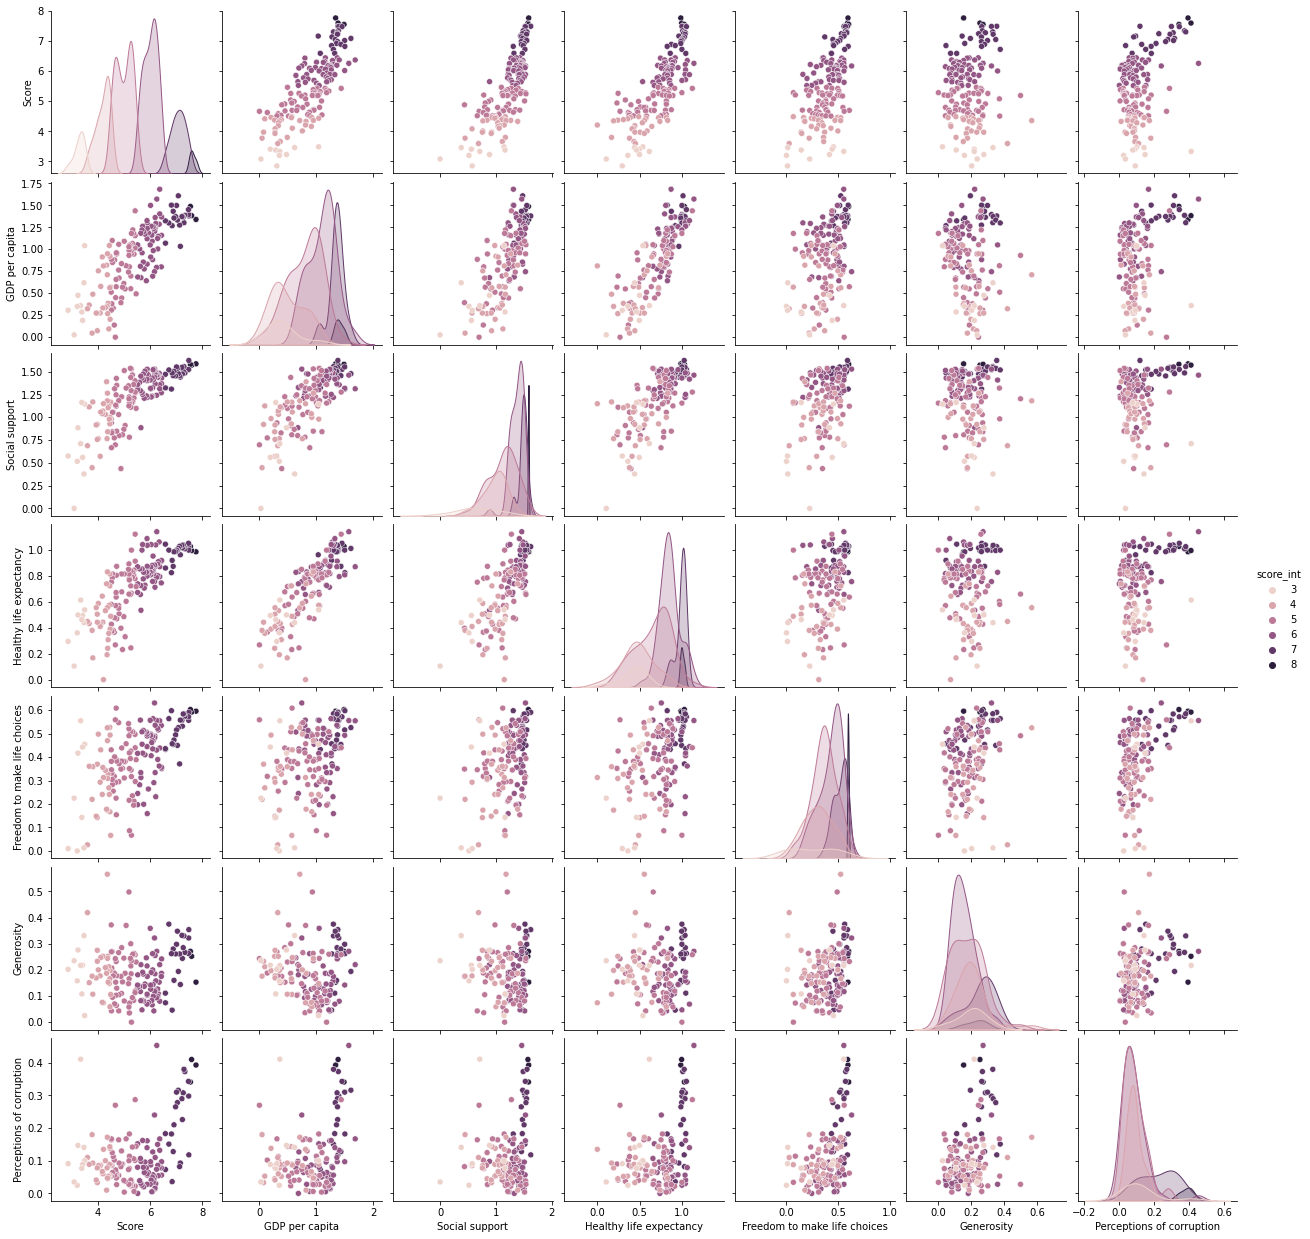

In [ ]:
sns.pairplot(df_origine, hue="score_int")

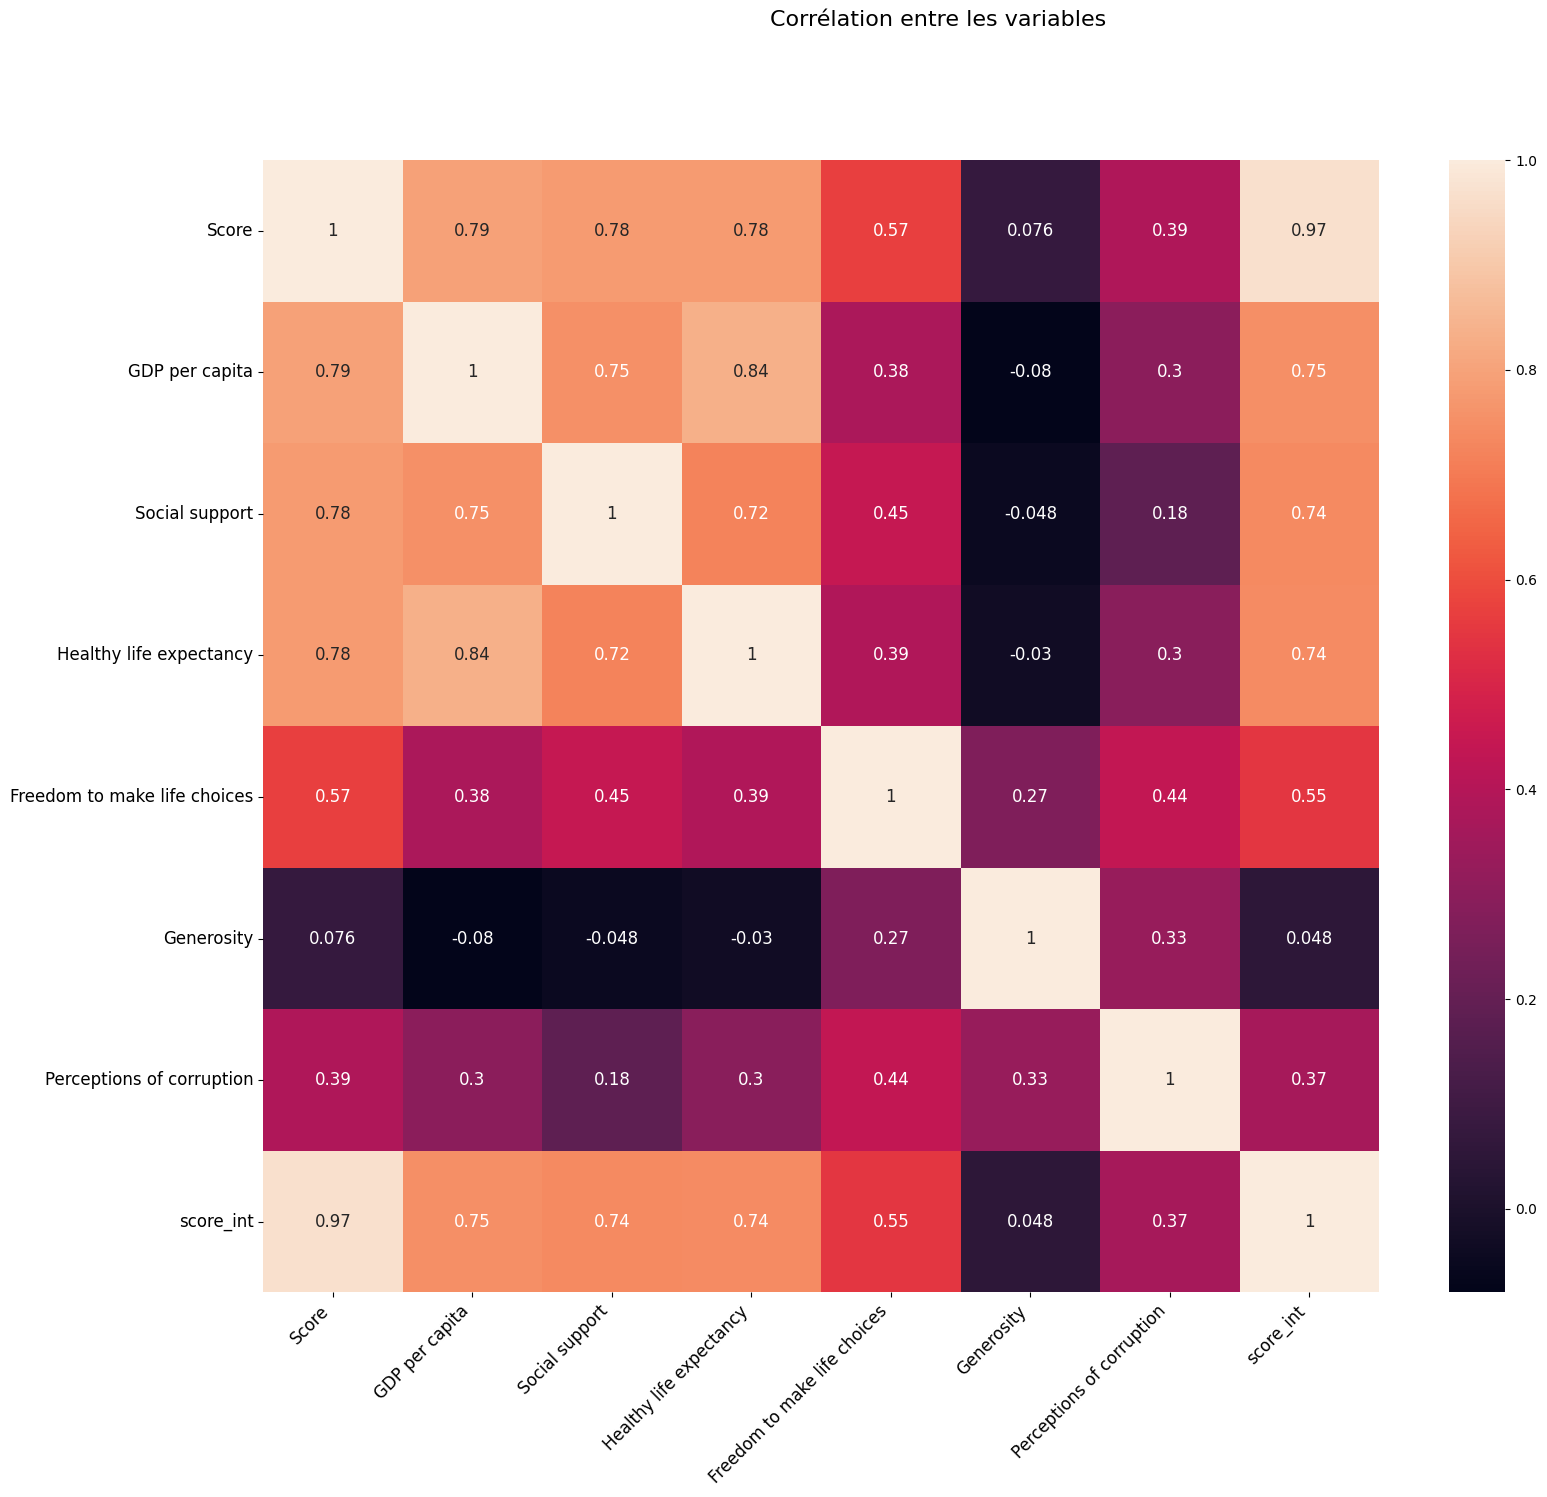

In [ ]:
draw_correlation_graphe(df_origine, "Corrélation entre les variables", verbose=verbose,fontsize=12)

<div style="display: flex; background-color: green;" >

## 1.3. Visualisation des outliers
</div>


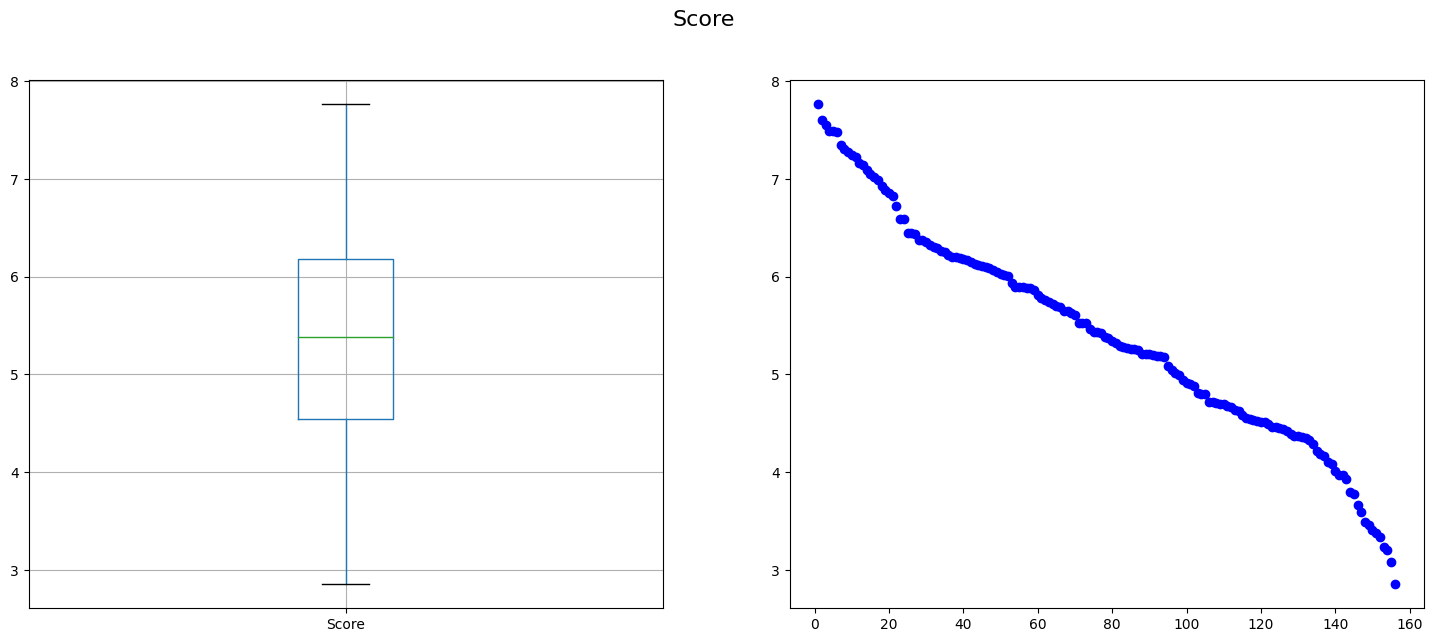

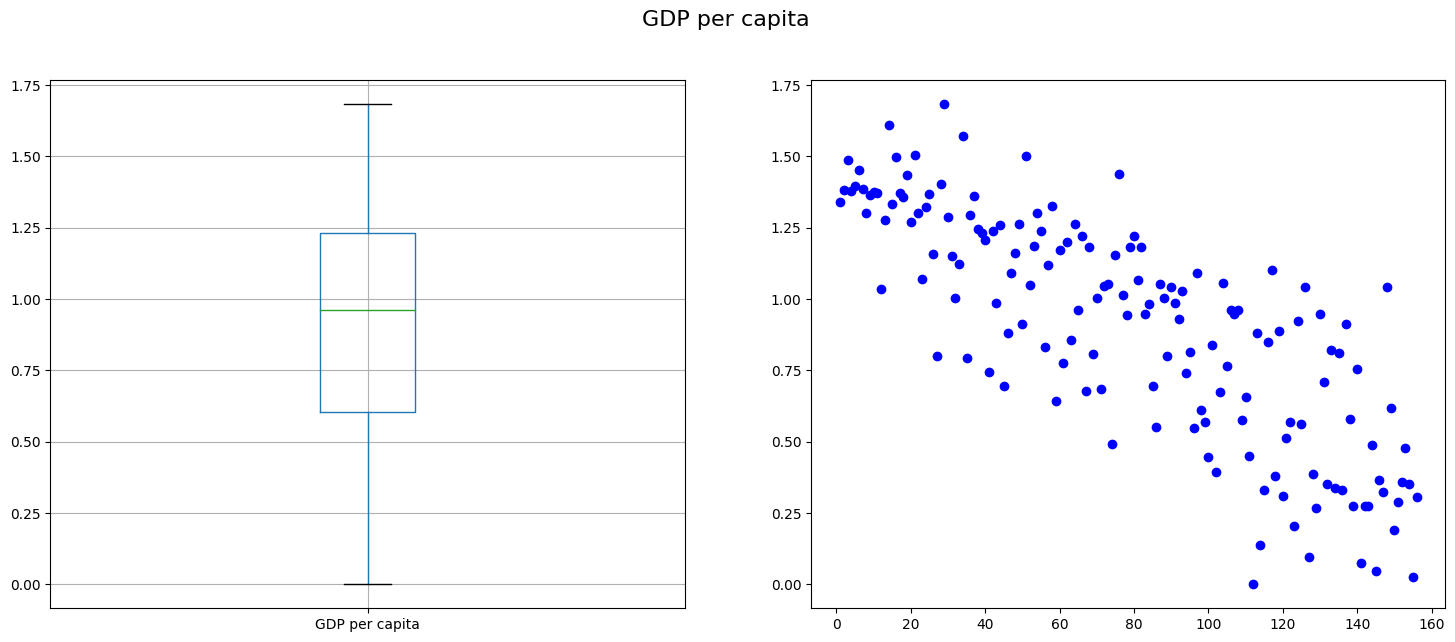

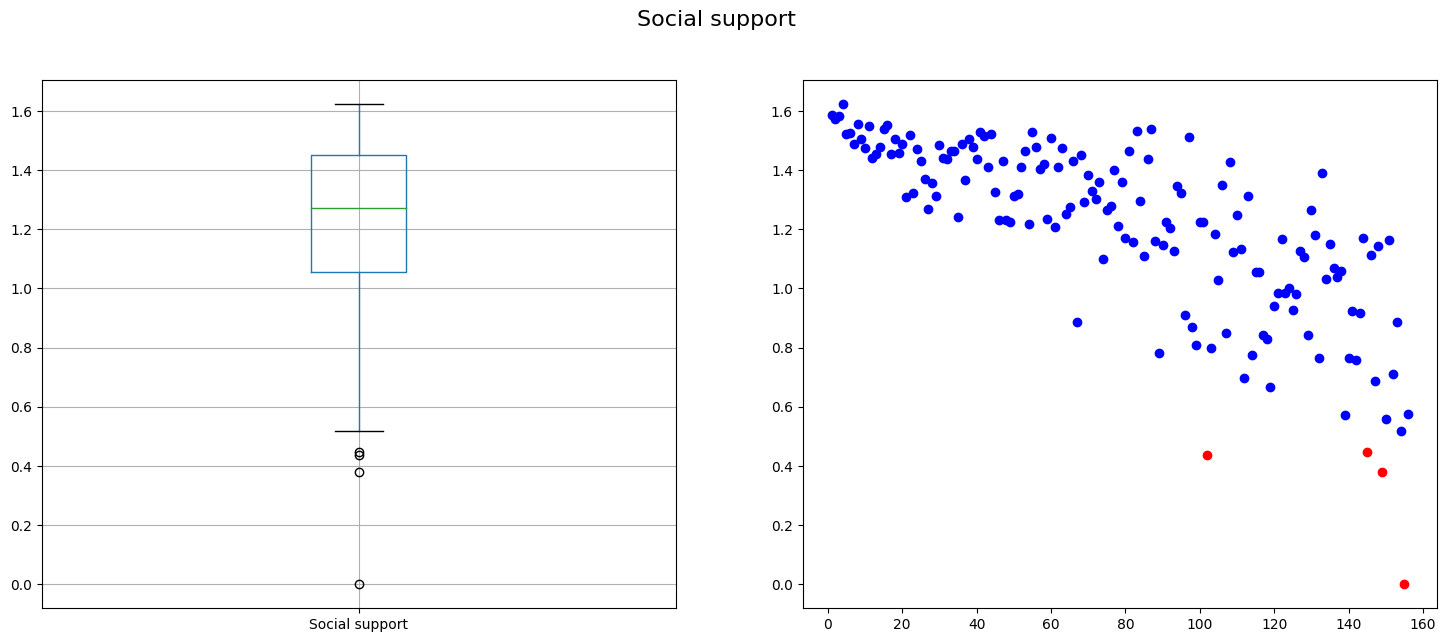

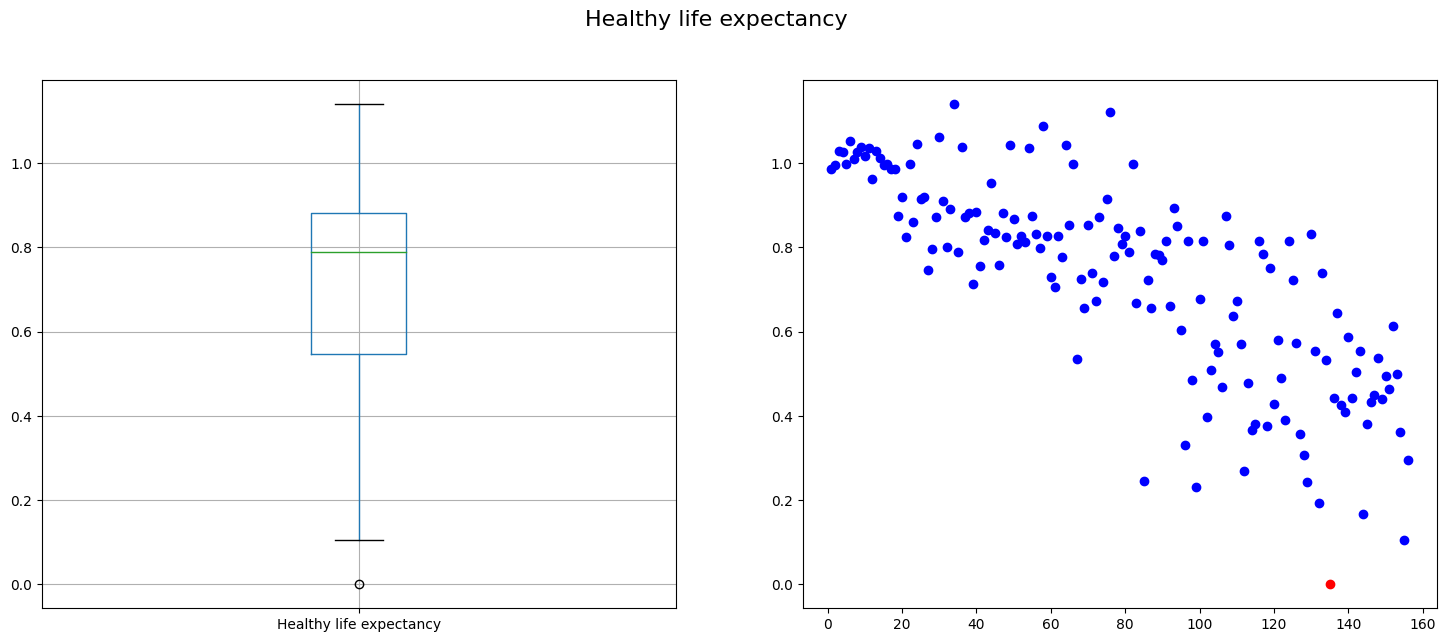

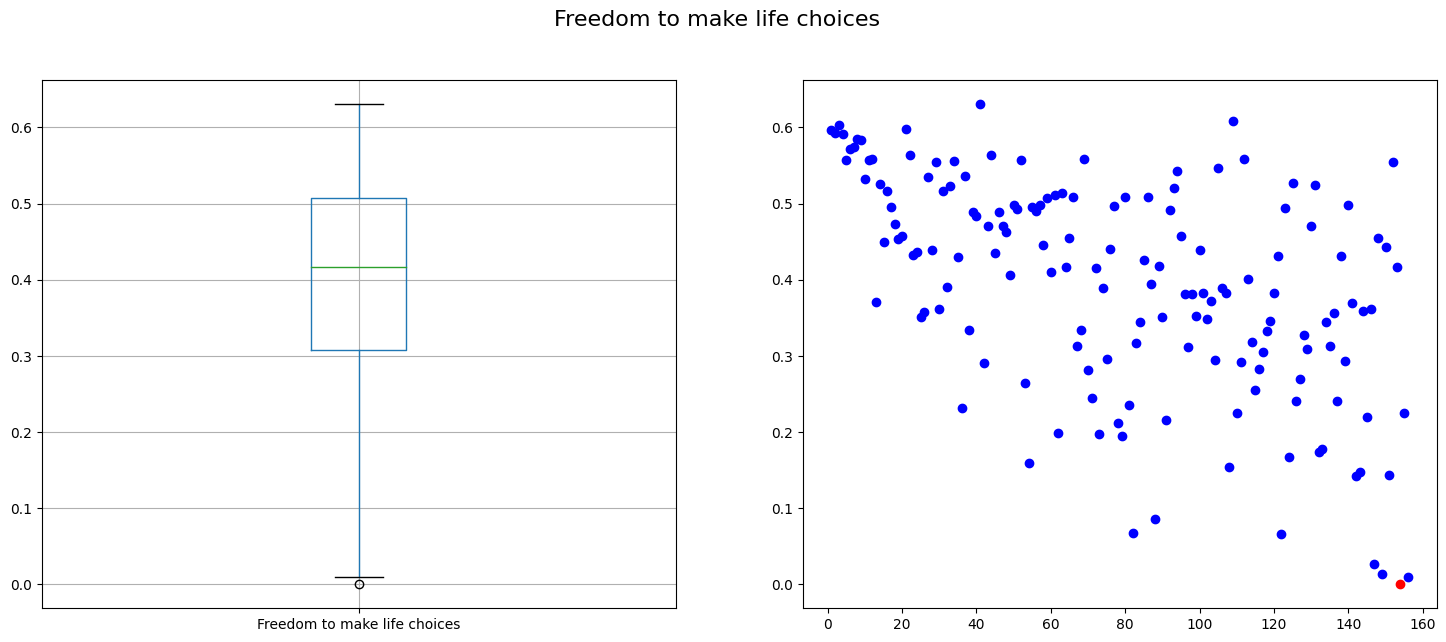

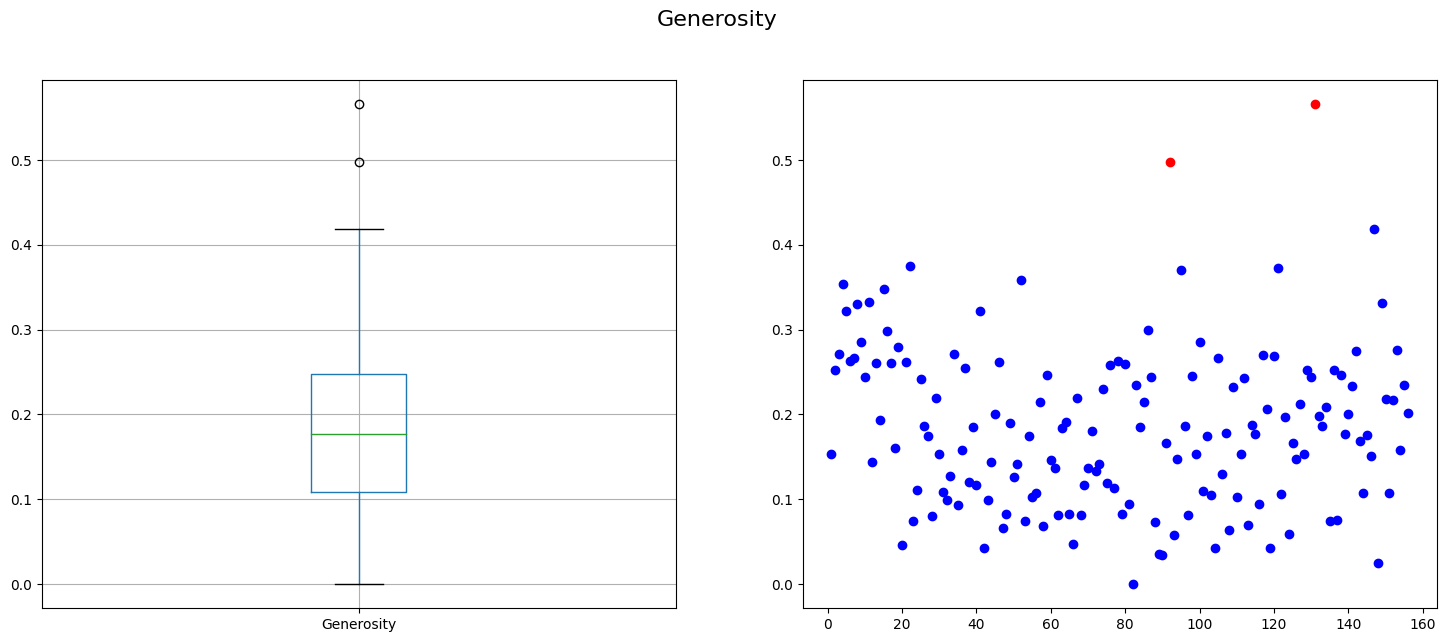

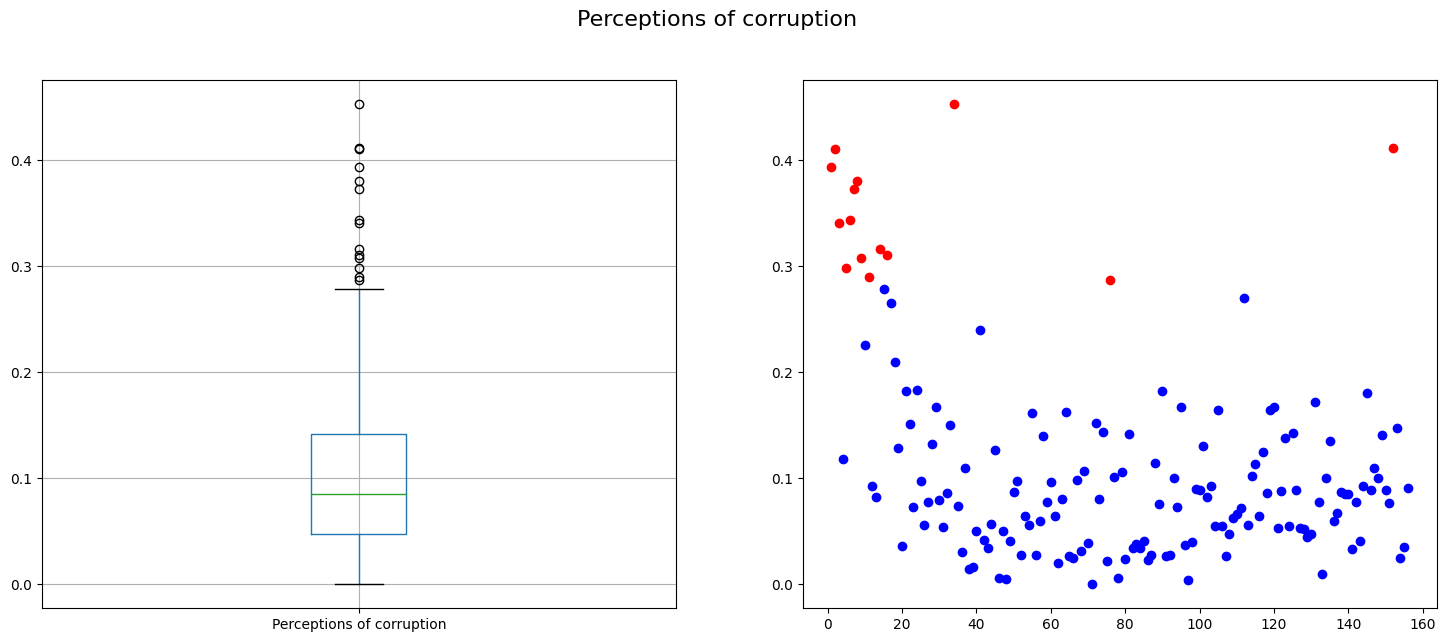

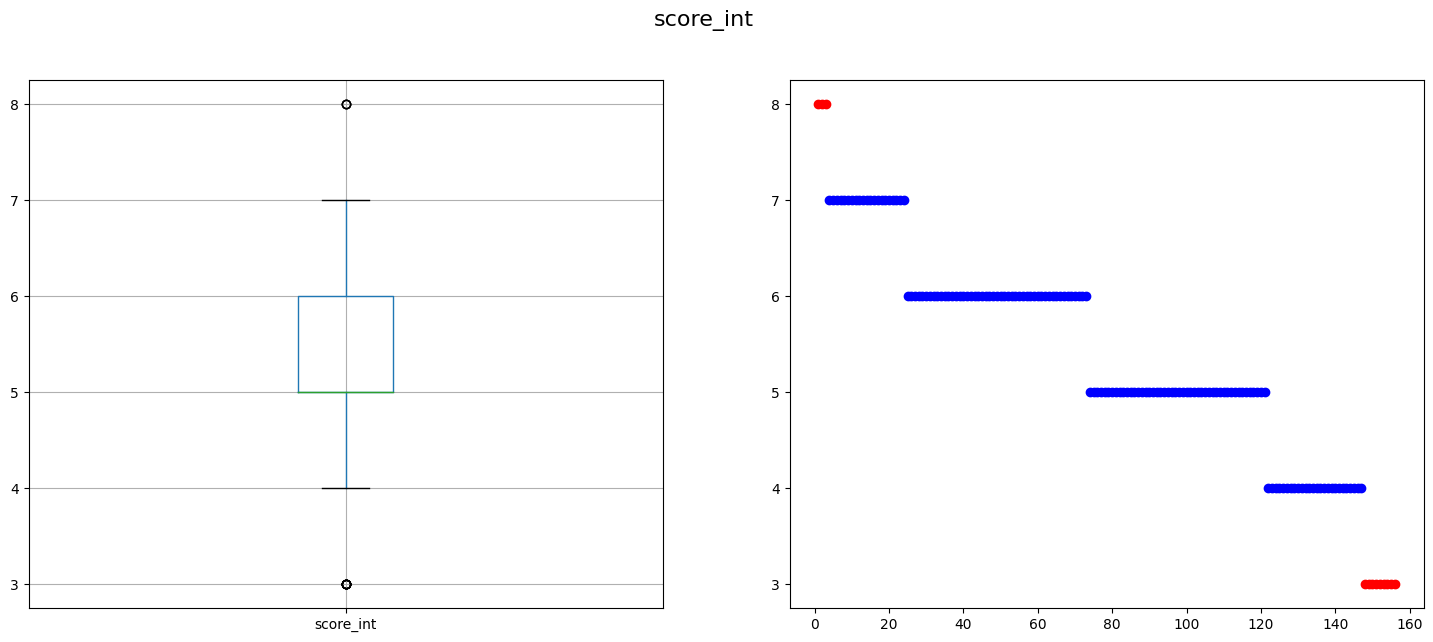

In [ ]:
cols = get_numeric_columns_names(df_origine)
for column_name in cols:
    q_low, q_hi,iqr, q_min, q_max = get_outliers_datas(df_origine, column_name)
    graphe_outliers(df_origine, column_name, q_min, q_max)

<div style="display: flex; background-color: green;" >

## 1.4. Analyse des autres doublons possible
</div>


# Chargement DF pays

In [ ]:
pays_file_name = "data_set_countries_clean.csv"

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Annexes
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

#### Titre 3
</div>